In [1]:
from pathlib import Path
import os
import shutil
import glob
import cv2
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/workspace/dataset/aff-wild_csv/mae_VA_annot_clip/train.csv')

In [4]:
len(train)

30369

In [5]:
val = pd.read_csv('/workspace/dataset/aff-wild_csv/mae_VA_annot_clip/val.csv')

In [6]:
len(val)

24865

In [22]:
train = pd.read_csv('/workspace/dataset/aff-wild_csv/train.csv')

In [76]:
train['image_path'][0]

'/workspace/dataset/aff-wild/110-30-270x480/00001.jpg'

In [29]:
train['name'] = train['image_path'].map(lambda x : x.split('/')[-2])

In [81]:
train['label'] = train['label'].astype(str)

In [82]:
train['du'] = train['name'] + "_" + train['label']

In [84]:
len(train['name'].unique())

248

In [85]:
len(train)

1089929

In [86]:
train[train['name'] == '5-60-1920x1080-2'].label.unique()

array(['0', '-1', '4', '5'], dtype=object)

In [87]:
train_du = train.drop_duplicates('du')

In [88]:
train_du[train_du['name'] == '5-60-1920x1080-2'].label

436807     0
436847    -1
438590     4
441232     5
Name: label, dtype: object

In [95]:
num_train = train_du.groupby('name').count().label.reset_index()

In [94]:
import matplotlib.pyplot as plt

In [96]:
num_train

,name,label
0,1-30-1280x720,3
1,10-60-1280x720,4
2,10-60-1280x720_right,3
3,100-29-1080x1920,3
4,101-30-1080x1920,3
...,...,...
243,video72,3
244,video79,4
245,video8,3
246,video93,3


In [124]:
x_index = num_train.label.unique()

In [131]:
num_train['label'].value_counts()

3    81
4    61
2    46
5    38
6    11
1     6
7     3
8     2
Name: label, dtype: int64

In [112]:
bar_train = num_train.label.value_counts().reset_index()

In [120]:
bar_train

,index,label
0,3,81
1,4,61
2,2,46
3,5,38
4,6,11
5,1,6
6,7,3
7,8,2


In [129]:
x_index

array([3, 4, 2, 5, 1, 6, 7, 8])

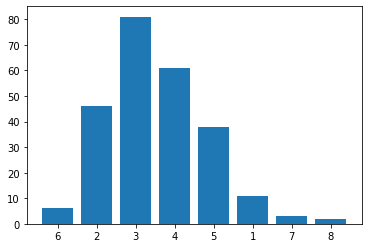

In [128]:
plt.bar(bar_train['index'],bar_train['label'])
plt.xticks(bar_train['index'], x_index)
plt.show()

In [13]:
import random

In [20]:
random.choice(list(train[train['label'] == 2].image_path))

'/workspace/dataset/aff-wild/7-60-1920x1080/21123.jpg'

In [9]:
path = '/workspace/dataset/netease/train/Aff_703/74accf26feb6ed4d4c4c53afb2e1ac9c05818b669c2d33f68d72b872.jpg'
img = cv2.imread(path)

In [10]:
type(img)

NoneType

In [18]:
np.array([0, 0, 1, 2, 3]) < 2

array([ True,  True,  True, False, False])

In [20]:
move_path = ['/workspace/dataset/netease/train/Aff_198/eb44ffab7227c4f52d376eedb53c552addd0040481e9a26aecf81fb9.jpg', '/workspace/dataset/netease/train/Aff2_103/29a31ebf1567693f4644c8ba3476ca9a72ee07fe67a5860d98707a0a.jpg', '/workspace/dataset/netease/train/Aff_443/2a5d42e9828b5a4515334abca99c801b68747657c314e79aae45667a.jpg', '/workspace/dataset/netease/train/Aff_538/3e7a367604a97e25a401831cf62bc1f6dbe62a2a0d8a01e003c38081.jpg', '/workspace/dataset/netease/train/Aff_703/74accf26feb6ed4d4c4c53afb2e1ac9c05818b669c2d33f68d72b872.jpg', '/workspace/dataset/netease/train/Aff_199/dd0e7db849a6eb0eeb0477eefb0baec6ee42cea6dc7d871beed194de.jpg']

In [24]:
new_path = '/workspace/dataset/affectnet_error'
for path in move_path:
    save_path = os.path.join(new_path, path.split('/')[-2], path.split('/')[-1])
    os.makedirs(save_path, exist_ok=True)
    shutil.move(path, save_path)

In [19]:
path = '/workspace/dataset/netease/train/Aff_703/74accf26feb6ed4d4c4c53afb2e1ac9c05818b669c2d33f68d72b872.jpg'
img = cv2.imread(path)
if img:
    print(True)
else:
    print(False)

KeyboardInterrupt: 

In [11]:
import pandas as pd

label_df = pd.read_csv('/workspace/identity_CelebA.txt', names=['name', 'label'], delimiter=' ')

In [12]:
celeba_path = os.listdir('/workspace/dataset/CelebA_aligned')

In [ ]:
for name in celeba_path:
    

In [ ]:
save_path = '/workspace/dataset/netease/train'

In [20]:
for cu_lb in label_df['label'].unique():
    each_save_path = os.path.join(save_path, cu_lb)
    cu_lb_list = list(label_df[label_df['label']==cu_lb].name)
    shutil.copytree()
    break

In [21]:
cu_lb_list

['000001.jpg',
 '000404.jpg',
 '003415.jpg',
 '004390.jpg',
 '018062.jpg',
 '025244.jpg',
 '027771.jpg',
 '039393.jpg',
 '047978.jpg',
 '049142.jpg',
 '052385.jpg',
 '052623.jpg',
 '053184.jpg',
 '053311.jpg',
 '055834.jpg',
 '058188.jpg',
 '061431.jpg',
 '068154.jpg',
 '084705.jpg',
 '090937.jpg',
 '096324.jpg',
 '100990.jpg',
 '103728.jpg',
 '108341.jpg',
 '110376.jpg',
 '122439.jpg',
 '131731.jpg',
 '134007.jpg',
 '139106.jpg',
 '140935.jpg']

In [18]:
list(label_df[label_df['label']==cu_lb].name)

['000001.jpg',
 '000404.jpg',
 '003415.jpg',
 '004390.jpg',
 '018062.jpg',
 '025244.jpg',
 '027771.jpg',
 '039393.jpg',
 '047978.jpg',
 '049142.jpg',
 '052385.jpg',
 '052623.jpg',
 '053184.jpg',
 '053311.jpg',
 '055834.jpg',
 '058188.jpg',
 '061431.jpg',
 '068154.jpg',
 '084705.jpg',
 '090937.jpg',
 '096324.jpg',
 '100990.jpg',
 '103728.jpg',
 '108341.jpg',
 '110376.jpg',
 '122439.jpg',
 '131731.jpg',
 '134007.jpg',
 '139106.jpg',
 '140935.jpg']

In [5]:
for jpg in label.iterrows():
    print(jpg)
    break

(0, name     000001.jpg
label          2880
Name: 0, dtype: object)


In [7]:
os.environ['USER'] = 'netease'

In [8]:
user = os.getenv("USER")

In [10]:
user

'netease'

In [14]:
Path("/workspace/MAE/checkpoint").is_dir()

True

In [18]:
p = Path(f"/workspace/MAE/checkpoint/{user}/experiments")


In [19]:
p

PosixPath('/workspace/MAE/checkpoint/netease/experiments')

In [27]:
os.makedirs(p, exist_ok=True)

In [22]:
mask_ratio = 0.75

In [78]:
import torch

In [79]:
x = torch.ones(1, 224, 224)

In [81]:
x.shape

torch.Size([1, 224, 224])

In [93]:
N, L, D = x.shape

In [82]:
L = 224
len_keep = int(L * (1 - mask_ratio))

In [83]:
len_keep

56

In [84]:
noise = torch.rand(1, L) 

In [85]:
noise.shape

torch.Size([1, 224])

In [86]:
ids_shuffle = torch.argsort(noise, dim=1)

In [87]:
ids_shuffle

tensor([[168, 214,  82, 176,  59,  41,  43, 170,  53,  75,  79, 177, 180, 102,
          65,   5, 100,  28, 110, 115,  39, 151,  38, 153, 129,  45,  70, 142,
          11, 189, 172,  80, 146,  55,  19, 120, 128,  37, 169,  88, 187,  97,
          17, 117, 121, 112,  36, 204, 207, 196, 171, 178,  30,  63,  87, 206,
         223, 101,  46,  18,  35, 210,  34, 164, 184, 186,  78, 199, 111,  23,
          32,   2,  15, 125,  42, 201,  22,  29, 130, 106, 213,  20,  77,  26,
         159, 216,  51, 205, 108, 135, 143,  61,   1, 215, 109, 174, 136, 173,
         220, 119,  27, 221, 209, 211,  84, 126, 140,   0,  85,  31, 118, 107,
          21, 148,   3, 131,  94,  83,  47, 203, 144, 147, 132, 175, 145, 124,
         149, 127, 179, 157, 141, 192,  13,   6,  69,  74,  64, 123, 105, 191,
          40, 181, 163,  66,  12,  14, 185,   9,  76, 165, 202, 218,  92, 219,
         167, 150, 217,  50, 133, 160, 190, 122,  54,  93,   7, 183, 113, 114,
         161,  16, 197, 200,  96, 152,  91,  57,  71

In [88]:
 # ascend: small is keep, large is remove
ids_restore = torch.argsort(ids_shuffle, dim=1)

In [89]:
ids_restore

tensor([[107,  92,  71, 114, 177,  15, 133, 164, 180, 147, 217,  28, 144, 132,
         145,  72, 169,  42,  59,  34,  81, 112,  76,  69, 205, 195,  83, 100,
          17,  77,  52, 109,  70, 222,  62,  60,  46,  37,  22,  20, 140,   5,
          74,   6, 186,  25,  58, 118, 190, 183, 157,  86, 198,   8, 162,  33,
         220, 175, 218,   4, 187,  91, 200,  53, 136,  14, 143, 192, 211, 134,
          26, 176, 182, 179, 135,   9, 148,  82,  66,  10,  31, 215,   2, 117,
         104, 108, 207,  54,  39, 209, 189, 174, 152, 163, 116, 208, 172,  41,
         206, 219,  16,  57,  13, 221, 194, 138,  79, 111,  88,  94,  18,  68,
          45, 166, 167,  19, 203,  43, 110,  99,  35,  44, 161, 137, 125,  73,
         105, 127,  36,  24,  78, 115, 122, 158, 196,  89,  96, 184, 185, 204,
         106, 130,  27,  90, 120, 124,  32, 121, 113, 126, 155,  21, 173,  23,
         191, 188, 199, 129, 201,  84, 159, 168, 214, 142,  63, 149, 213, 154,
           0,  38,   7,  50,  30,  97,  95, 123,   3

In [90]:
ids_keep = ids_shuffle[:, :len_keep]

In [91]:
ids_keep

tensor([[168, 214,  82, 176,  59,  41,  43, 170,  53,  75,  79, 177, 180, 102,
          65,   5, 100,  28, 110, 115,  39, 151,  38, 153, 129,  45,  70, 142,
          11, 189, 172,  80, 146,  55,  19, 120, 128,  37, 169,  88, 187,  97,
          17, 117, 121, 112,  36, 204, 207, 196, 171, 178,  30,  63,  87, 206]])

In [94]:
x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

In [110]:
x_masked.shape

torch.Size([1, 56, 224])

In [98]:
ids_keep.unsqueeze(-1).repeat(1, 1, D)

tensor([[[168, 168, 168,  ..., 168, 168, 168],
         [214, 214, 214,  ..., 214, 214, 214],
         [ 82,  82,  82,  ...,  82,  82,  82],
         ...,
         [ 63,  63,  63,  ...,  63,  63,  63],
         [ 87,  87,  87,  ...,  87,  87,  87],
         [206, 206, 206,  ..., 206, 206, 206]]])

In [111]:
mask = torch.ones([N, L])

In [112]:
mask.shape

torch.Size([1, 224])

In [113]:
len_keep

56

In [114]:
mask[:, :len_keep] = 0

In [116]:
mask

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.,

In [117]:
mask = torch.gather(mask, dim=1, index=ids_restore)

In [121]:
ids_restore.shape

torch.Size([1, 224])

In [118]:
mask.shape

torch.Size([1, 224])

In [106]:
ids_restore

tensor([[107,  92,  71, 114, 177,  15, 133, 164, 180, 147, 217,  28, 144, 132,
         145,  72, 169,  42,  59,  34,  81, 112,  76,  69, 205, 195,  83, 100,
          17,  77,  52, 109,  70, 222,  62,  60,  46,  37,  22,  20, 140,   5,
          74,   6, 186,  25,  58, 118, 190, 183, 157,  86, 198,   8, 162,  33,
         220, 175, 218,   4, 187,  91, 200,  53, 136,  14, 143, 192, 211, 134,
          26, 176, 182, 179, 135,   9, 148,  82,  66,  10,  31, 215,   2, 117,
         104, 108, 207,  54,  39, 209, 189, 174, 152, 163, 116, 208, 172,  41,
         206, 219,  16,  57,  13, 221, 194, 138,  79, 111,  88,  94,  18,  68,
          45, 166, 167,  19, 203,  43, 110,  99,  35,  44, 161, 137, 125,  73,
         105, 127,  36,  24,  78, 115, 122, 158, 196,  89,  96, 184, 185, 204,
         106, 130,  27,  90, 120, 124,  32, 121, 113, 126, 155,  21, 173,  23,
         191, 188, 199, 129, 201,  84, 159, 168, 214, 142,  63, 149, 213, 154,
           0,  38,   7,  50,  30,  97,  95, 123,   3

In [105]:
mask

tensor([[1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
         1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
         1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
         1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
         1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
         1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
         1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
         0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
         1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
         1., 1., 1., 1., 1.,